# Necessary Libraries

In [1]:
#Regression Analysis
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

import re

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('listings.csv')

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,"I'm renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the ""Indische Buurt"". Amsterdam’s historic centre is less than 15 minutes away by bike or tram. The features of the room are: - Twin beds (80 x 200 cm, down quilts and pillows) - 2 pure cotton towels for each guest - reading lamps - bedside table - wardrobe - table with chairs - tea and coffee making facilities - mini bar - alarm clock - Hi-Fi system with cd player, connection for mp3 player / phone - map of Amsterdam and public transport - Wi-Fi Internet connection Extra services: - Bike rental","Quiet Garden View Room & Super Fast WiFi I'm renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the ""Indische Buurt"". Amsterdam’s historic centre is less than 15 minutes away by bike or tram. The features of the room are: - Twin beds (80 x 200 cm, down quilts and pillows) - 2 pure cotton towels for each guest - reading lamps - bedside table - wardrobe - table with chairs - tea and coffee making facilities - mini bar - alarm clock - Hi-Fi system with cd player, connection for mp3 player / phone - map of Amsterdam and public transport - Wi-Fi Internet connection Extra services: - Bike rental Indische Buurt (""Indies Neighborhood"") is a neighbourhood in the eastern portion of the city of Amsterdam, in the Dutch province of Noord-Holland. The name dates from the early 20th century and is derived from the fact that the neighbourhood's streets are named after islands a",none,"Indische Buurt (""Indies Neighborhood"") is a neighbourhood in the eastern portion of the city of Amsterdam, in the Dutch province of Noord-Holland. The name dates from the early 20th century and is derived from the fact that the neighbourhood's streets are named after islands and other geographical concepts in the former Dutch colony of the Dutch East Indies. The first street was named in 1902. In 2003, there were arou

In [4]:
df.isnull().sum()

id                                              0    
listing_url                                     0    
scrape_id                                       0    
last_scraped                                    0    
name                                            35   
summary                                         629  
space                                           5422 
description                                     219  
experiences_offered                             0    
neighborhood_overview                           6584 
notes                                           11523
transit                                         6302 
access                                          8468 
interaction                                     7988 
house_rules                                     7883 
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                     0    
xl_picture_url              

# Data Preprocessing

In [5]:
#Let`s make a list of columns that might be used for insights and analysis
col_of_interest=['host_id','host_response_rate','host_is_superhost','longitude', 'latitude','city',
                'neighbourhood_cleansed','property_type', 'room_type','bathrooms','bedrooms','beds',
                 'bed_type', 'square_feet','price','minimum_nights','number_of_reviews',
                 'calculated_host_listings_count','reviews_per_month','availability_30', 'availability_365']

In [6]:
df=df[col_of_interest]
df.head()

,host_id,host_response_rate,host_is_superhost,longitude,latitude,city,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,square_feet,price,minimum_nights,number_of_reviews,calculated_host_listings_count,reviews_per_month,availability_30,availability_365
0,3159,100%,t,4.9414,52.3657,Amsterdam,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,1.5000,1.0000,2.0000,Real Bed,nan,$59.00,3,267,1,2.1200,8,89
1,59484,100%,f,4.8935,52.3651,Amsterdam,Centrum-Oost,Townhouse,Private room,1.0000,1.0000,1.0000,Real Bed,nan,$80.00,1,283,2,2.4600,0,124
2,56142,100%,f,4.8834,52.3730,Amsterdam,Centrum-West,Apartment,Entire home/apt,1.0000,1.0000,1.0000,Real Bed,nan,$125.00,14,3,2,0.1600,4,75
3,97647,100%,t,4.8921,52.3867,Amsterdam,Centrum-West,Houseboat,Private room,1.0000,1.0000,1.0000,Real Bed,nan,$150.00,2,195,1,2.1100,6,66
4,124245,100%,t,4.8909,52.3672,Amsterdam,Centrum-West,Apartment,Private room,1.0000,1.0000,1.0000,Real Bed,nan,$75.00,2,283,3,2.5900,2,138


In [7]:
df.shape

(20677, 21)

In [8]:
df.dtypes

host_id                           int64  
host_response_rate                object 
host_is_superhost                 object 
longitude                         float64
latitude                          float64
city                              object 
neighbourhood_cleansed            object 
property_type                     object 
room_type                         object 
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                          object 
square_feet                       float64
price                             object 
minimum_nights                    int64  
number_of_reviews                 int64  
calculated_host_listings_count    int64  
reviews_per_month                 float64
availability_30                   int64  
availability_365                  int64  
dtype: object

In [9]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [10]:
df.price = df.price.str.strip("$").str.replace(",", "")

In [11]:
df.select_dtypes('object')

,host_is_superhost,city,neighbourhood_cleansed,property_type,room_type,bed_type,price
0,t,Amsterdam,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,Real Bed,59.00
1,f,Amsterdam,Centrum-Oost,Townhouse,Private room,Real Bed,80.00
2,f,Amsterdam,Centrum-West,Apartment,Entire home/apt,Real Bed,125.00
3,t,Amsterdam,Centrum-West,Houseboat,Private room,Real Bed,150.00
4,t,Amsterdam,Centrum-West,Apartment,Private room,Real Bed,75.00
5,t,Amsterdam,Centrum-West,Apartment,Private room,Real Bed,55.00
6,f,Amsterdam,Zuid,Apartment,Entire home/apt,Real Bed,219.00
7,f,Amsterdam,Centrum-West,Apartment,Entire home/apt,Futon,145.00
8,t,Amsterdam,Centrum-West,Bed and breakfast,Private room,Real Bed,159.00
9,f,Amsterdam,Centrum-West,Apartment,Entire home/apt,Real Bed,210.00


In [12]:
numeric_col = ['price']

In [13]:
df[df[numeric_col].select_dtypes('object').columns] = df[df[numeric_col].select_dtypes('object').columns].astype(np.float64)

In [14]:
df.dtypes

host_id                           int64  
host_response_rate                float64
host_is_superhost                 object 
longitude                         float64
latitude                          float64
city                              object 
neighbourhood_cleansed            object 
property_type                     object 
room_type                         object 
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                          object 
square_feet                       float64
price                             float64
minimum_nights                    int64  
number_of_reviews                 int64  
calculated_host_listings_count    int64  
reviews_per_month                 float64
availability_30                   int64  
availability_365                  int64  
dtype: object

In [15]:
#Null values in columns
df.isnull().sum()

host_id                           0    
host_response_rate                8541 
host_is_superhost                 12   
longitude                         0    
latitude                          0    
city                              4    
neighbourhood_cleansed            0    
property_type                     0    
room_type                         0    
bathrooms                         6    
bedrooms                          8    
beds                              8    
bed_type                          0    
square_feet                       20291
price                             0    
minimum_nights                    0    
number_of_reviews                 0    
calculated_host_listings_count    0    
reviews_per_month                 2593 
availability_30                   0    
availability_365                  0    
dtype: int64

In [16]:
#We have to drop square_feet becaue null values are too much.
#for other columns we could remove records with null values.
df.drop('square_feet', axis=1, inplace=True)
#examing the changes
df.head(5)

,host_id,host_response_rate,host_is_superhost,longitude,latitude,city,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,reviews_per_month,availability_30,availability_365
0,3159,1.0000,t,4.9414,52.3657,Amsterdam,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,1.5000,1.0000,2.0000,Real Bed,59.0000,3,267,1,2.1200,8,89
1,59484,1.0000,f,4.8935,52.3651,Amsterdam,Centrum-Oost,Townhouse,Private room,1.0000,1.0000,1.0000,Real Bed,80.0000,1,283,2,2.4600,0,124
2,56142,1.0000,f,4.8834,52.3730,Amsterdam,Centrum-West,Apartment,Entire home/apt,1.0000,1.0000,1.0000,Real Bed,125.0000,14,3,2,0.1600,4,75
3,97647,1.0000,t,4.8921,52.3867,Amsterdam,Centrum-West,Houseboat,Private room,1.0000,1.0000,1.0000,Real Bed,150.0000,2,195,1,2.1100,6,66
4,124245,1.0000,t,4.8909,52.3672,Amsterdam,Centrum-West,Apartment,Private room,1.0000,1.0000,1.0000,Real Bed,75.0000,2,283,3,2.5900,2,138


In [17]:
#removing rows that have null values
df = df.dropna()

In [18]:
df.shape

(10907, 20)

In [19]:
df.city.unique()

array(['Amsterdam', 'De Pijp', 'Bos en Lommer', 'Watergraafsmeer',
       'Jordaan', 'Zeeburg', 'Amsterdam-Zuidoost', 'Amsterdam Zuid-Oost',
       'Halfweg', 'Ámsterdam', 'Nederland', 'Amsterdam ', 'Diemen',
       'Amsterdam Zuidoost', 'Амстердам', 'Amsterdam (Zunderdorp)',
       'Duivendrecht', 'Lijnden', 'Amsterdam, Noord-Holland, NL',
       '1015 SN Amsterdam', 'Badhoevedorp', 'AMSTERDAM',
       'North Amsterdam', 'Central Amsterdam', 'amsterdam', 'Landsmeer',
       'Zwanenburg', 'Watergang'], dtype=object)

In [20]:
df['city']= df.city.replace('Ámsterdam','Amsterdam')
df['city']= df.city.replace('Amsterdam Zuid-Oost','Amsterdam Zuidoost')
df['city']= df.city.replace('Amsterdam ','Amsterdam')
df['city']= df.city.replace('Amsterdam-Zuidoost','Amsterdam Zuidoost')
df['city']= df.city.replace('Амстердам','Amsterdam')
df['city']= df.city.replace('Amsterdam (Zunderdorp)','Amsterdam')
df['city']= df.city.replace('Amsterdam, Noord-Holland, NL','Amsterdam')
df['city']= df.city.replace('1015 SN Amsterdam','Amsterdam')
df['city']= df.city.replace('AMSTERDAM','Amsterdam')
df['city']= df.city.replace('amsterdam','Amsterdam')

In this analysis, I decided to predict the prices of the rooms for rent for city of Amsterdam. I came to this decision because I believe it will be more accurate if a model is built to each city separately. Due to the time constraints, I will stick to Amsterdam only.

In [21]:
df = df[df['city'].isin(['Amsterdam'])]
df.city.unique()

array(['Amsterdam'], dtype=object)

In [22]:
df.host_is_superhost.unique()

array(['t', 'f'], dtype=object)

In [23]:
df['host_is_superhost'].replace(['t','f'],['1','0'],inplace=True)

In [24]:
df.neighbourhood_cleansed.unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'Zuid', 'Bos en Lommer', 'Westerpark',
       'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West', 'Oud-Oost',
       'Slotervaart', 'Oud-Noord', 'Watergraafsmeer', 'Noord-Oost',
       'Geuzenveld - Slotermeer', 'Buitenveldert - Zuidas',
       'IJburg - Zeeburgereiland', 'Noord-West', 'De Aker - Nieuw Sloten',
       'Osdorp', 'Bijlmer-Centrum', 'Gaasperdam - Driemond',
       'Bijlmer-Oost'], dtype=object)

In [25]:
df.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast',
       'Guest suite', 'Loft', 'Serviced apartment', 'Boutique hotel',
       'Guesthouse', 'Condominium', 'House', 'Boat', 'Villa', 'Other',
       'Chalet', 'Nature lodge', 'Tiny house', 'Island', 'Hotel', 'Cabin',
       'Lighthouse', 'Camper/RV', 'Barn', 'Bungalow', 'Cottage',
       'Dome house', 'Castle', 'Casa particular (Cuba)', 'Aparthotel',
       'Hostel', 'Campsite', 'Tent'], dtype=object)

In [26]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [27]:
df.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

# Visualizations
Let`s try to derive some insgights from the data

Text(0, 0.5, 'Count')

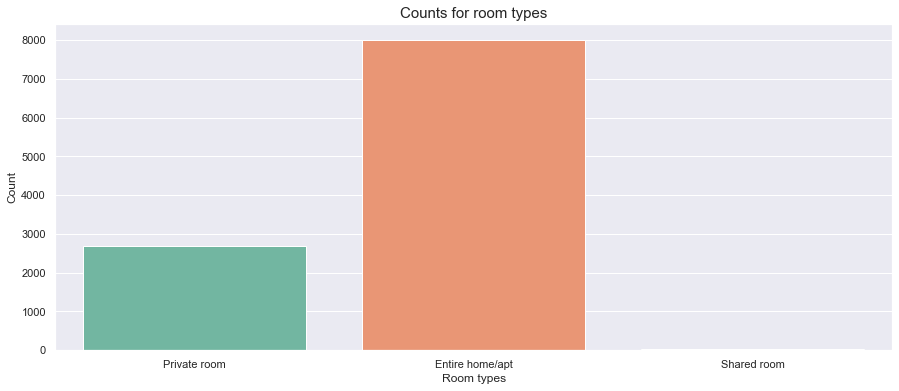

In [28]:
#Viz 1
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='room_type', palette='Set2')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

In [29]:
#let's see what hosts (IDs) have the most listings on Airbnb and taking advantage of this service
top_host=df.host_id.value_counts().head(10)
top_host

65859990     184
1464510      100
113977564    58 
107745142    39 
84453740     27 
14183886     24 
7594884      23 
13405827     21 
44168250     19 
84449589     18 
Name: host_id, dtype: int64

In [30]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '65859990'),
 Text(0, 0, '1464510'),
 Text(0, 0, '113977564'),
 Text(0, 0, '107745142'),
 Text(0, 0, '84453740'),
 Text(0, 0, '14183886'),
 Text(0, 0, '7594884'),
 Text(0, 0, '13405827'),
 Text(0, 0, '44168250'),
 Text(0, 0, '84449589')]

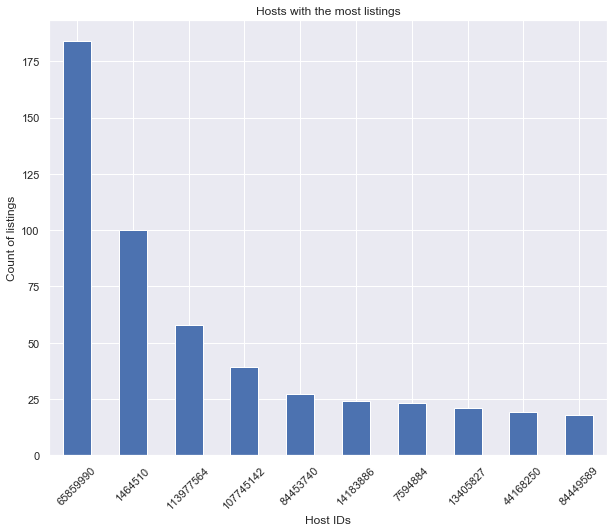

In [31]:
#Viz 2
viz_2=top_host.plot(kind='bar')
viz_2.set_title('Hosts with the most listings')
viz_2.set_ylabel('Count of listings')
viz_2.set_xlabel('Host IDs')
viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=45)

In [32]:
#Let`s see top neighbourhoods in term of their listings count
top_neighbourhood=df.neighbourhood_cleansed.value_counts().head(10)
top_neighbourhood

De Baarsjes - Oud-West                    1754
Centrum-West                              1455
De Pijp - Rivierenbuurt                   1256
Centrum-Oost                              1013
Westerpark                                810 
Zuid                                      710 
Oud-Oost                                  688 
Bos en Lommer                             597 
Oostelijk Havengebied - Indische Buurt    498 
Oud-Noord                                 334 
Name: neighbourhood_cleansed, dtype: int64

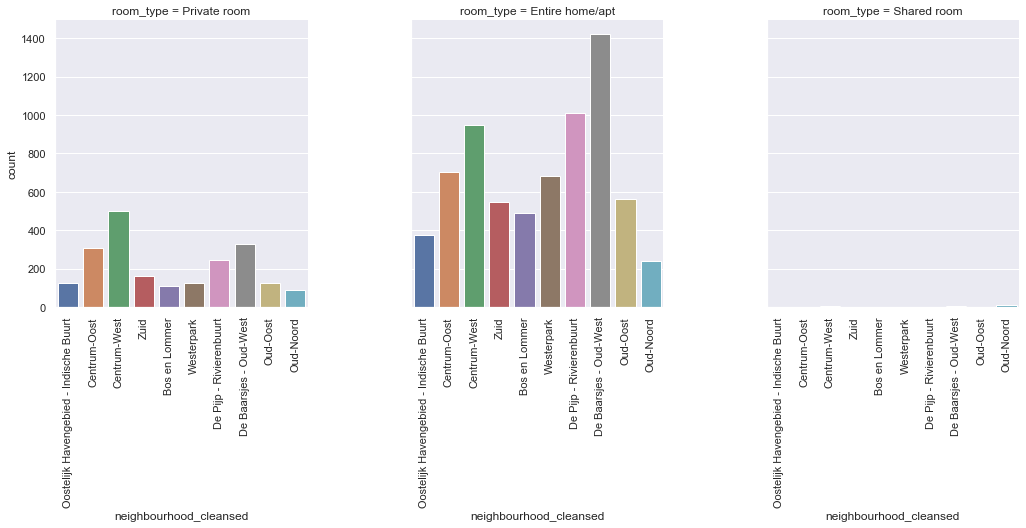

In [33]:
#Viz 3
#let's visualize them in accordance with room-types. 
#We will find out which room type is more/less frequent in neghrbourhoods.
#grabbing top 10 neighbourhoods for sub-dataframe
sub_1=df.loc[df['neighbourhood_cleansed'].isin(['De Baarsjes - Oud-West','De Pijp - Rivierenbuurt','Centrum-West',
                                                'Centrum-Oost','Westerpark','Zuid','Oud-Oost','Bos en Lommer',
                                                'Oostelijk Havengebied - Indische Buurt','Oud-Noord'])]
#using catplot to represent attributes and a count
viz_3=sns.catplot(x='neighbourhood_cleansed', col='room_type', data=sub_1, kind='count')
viz_3.set_xticklabels(rotation=90)

In [34]:
#let's find out more about top 5 neighbourhoods.

#De Baarsjes - Oud-West
sub_2=df.loc[df['neighbourhood_cleansed'] == 'De Baarsjes - Oud-West']
price_sub1=sub_2[['price']]
#Centrum-West
sub_3=df.loc[df['neighbourhood_cleansed'] == 'Centrum-West']
price_sub2=sub_3[['price']]
#De Pijp - Rivierenbuurt
sub_4=df.loc[df['neighbourhood_cleansed'] == 'De Pijp - Rivierenbuurt']
price_sub3=sub_4[['price']]
#Centrum-Oost
sub_5=df.loc[df['neighbourhood_cleansed'] == 'Centrum-Oost']
price_sub4=sub_5[['price']]
#Westerpark
sub_6=df.loc[df['neighbourhood_cleansed'] == 'Westerpark']
price_sub5=sub_6[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [35]:
#creating an empty list that we will append later with price distributions for each neighbourhood_cleansed
p_l_b_n_2=[]
#creating list with known values in neighbourhood_cleansed column
nei_list=['De Baarsjes - Oud-West', 'Centrum-West', 'De Pijp - Rivierenbuurt', 'Centrum-Oost', 'Westerpark']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,De Baarsjes - Oud-West,Centrum-West,De Pijp - Rivierenbuurt,Centrum-Oost,Westerpark
Stats,,,,,
min,35.0000,29.0000,39.0000,50.0000,30.0000
25%,100.0000,120.0000,100.0000,120.0000,100.0000
50%,135.0000,160.0000,149.0000,160.0000,130.0000
75%,180.0000,240.0000,200.0000,235.0000,179.0000
max,1000.0000,5040.0000,1230.0000,2000.0000,1000.0000


In the above descriptive statistics we see that 5 neighbourhoods which have the most listings have median between 130
and 160. The max values however are significantly different from one another. Hence, we can assume that there are outliers and we shouldn`t involve them in our regression analysis.

(10744, 20)

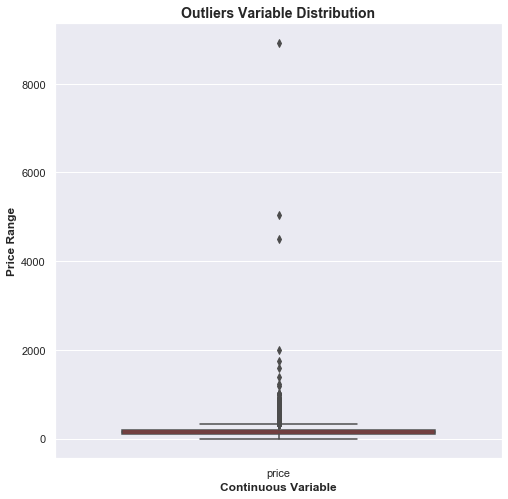

In [36]:
#Viz 4
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

The boxplot explicitly displays that there are outliers and they shouldnt be considered in our analysis.

In [37]:
df = df[df['price'] <= 350]
#df['keep'] = df.apply(lambda row: sum(any([(x < 1000) for x in row])), axis = 1)
#df.drop(df.loc[df['price']<=1000].index, inplace=True)
#df['price']=df[(df.price <= 1000)]

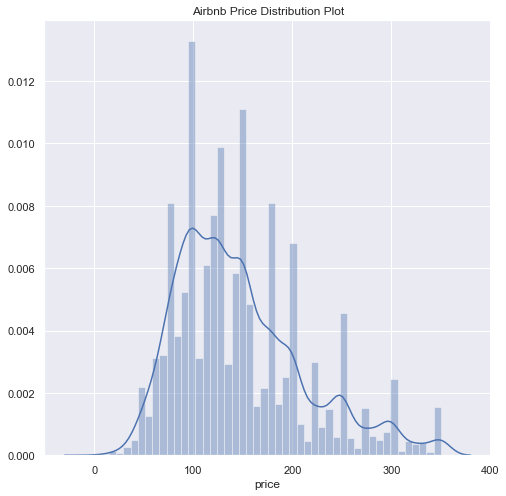

In [38]:
#Viz 5
#Distribution of the price
plt.figure(figsize=(8,8))

plt.title('Airbnb Price Distribution Plot')
sns.distplot(df['price'])

In the histogram above, I am convinced that majority of the prices appear within a range between 20 to 350. Hence, we would take price between the minimum and 350$ for our analysis.

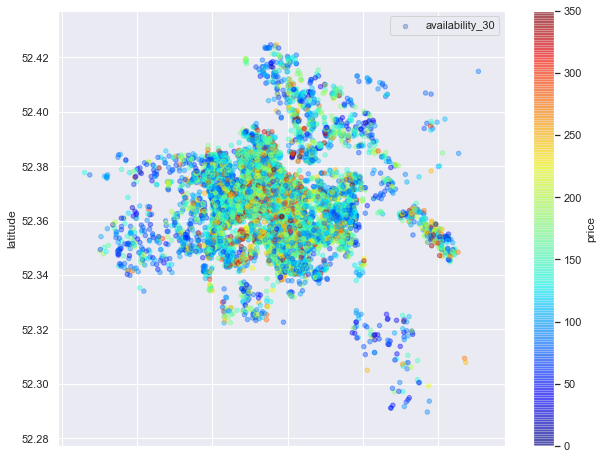

In [39]:
#Viz 6
#creating a sub-dataframe with no extreme values / less than 1000
sub_7=df[df.price< 1000]
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_6=sub_7.plot(kind='scatter', x='longitude', y='latitude', label='availability_30', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_6.legend()

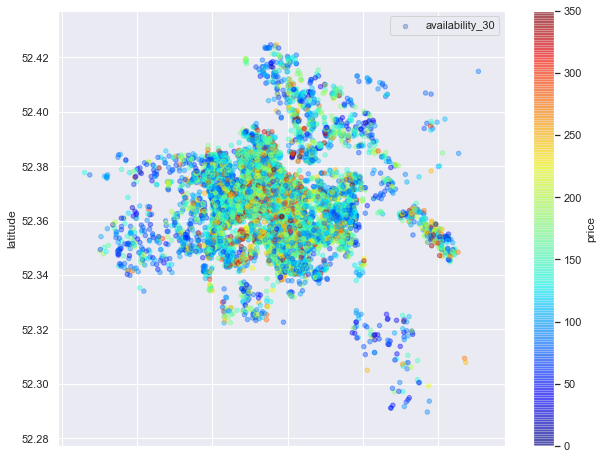

In [40]:
#Viz 7
#creating a sub-dataframe with no extreme values / less than 500
sub_8=df[df.price < 500]
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_7=sub_8.plot(kind='scatter', x='longitude', y='latitude', label='availability_30', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_7.legend()

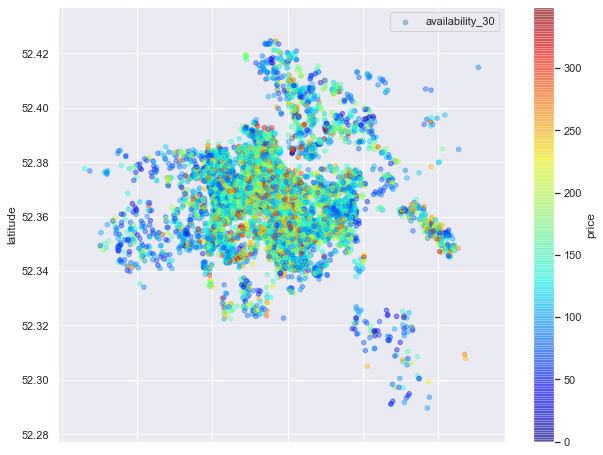

In [41]:
#Viz 8
#creating a sub-dataframe with no extreme values / less than 500
sub_8=df[df.price < 350]
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_8=sub_8.plot(kind='scatter', x='longitude', y='latitude', label='availability_30', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_8.legend()

In [42]:
df.dtypes

host_id                           int64  
host_response_rate                float64
host_is_superhost                 object 
longitude                         float64
latitude                          float64
city                              object 
neighbourhood_cleansed            object 
property_type                     object 
room_type                         object 
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                          object 
price                             float64
minimum_nights                    int64  
number_of_reviews                 int64  
calculated_host_listings_count    int64  
reviews_per_month                 float64
availability_30                   int64  
availability_365                  int64  
dtype: object

# Data Preparation

In [43]:
#Let`s reorganize columns and rows for our MLR analysis
num_cols=['host_response_rate','bathrooms','bedrooms','beds','minimum_nights','number_of_reviews','calculated_host_listings_count',
          'reviews_per_month','availability_30','availability_365']
cat_cols=['host_is_superhost','room_type','neighbourhood_cleansed','bed_type','property_type']
target=['price']

In [44]:
df_col = []
df_col.extend(num_cols)
df_col.extend(cat_cols)
df_col.extend(target)
df = df[df_col]
df.head()

,host_response_rate,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,calculated_host_listings_count,reviews_per_month,availability_30,availability_365,host_is_superhost,room_type,neighbourhood_cleansed,bed_type,property_type,price
0,1.0000,1.5000,1.0000,2.0000,3,267,1,2.1200,8,89,1,Private room,Oostelijk Havengebied - Indische Buurt,Real Bed,Apartment,59.0000
1,1.0000,1.0000,1.0000,1.0000,1,283,2,2.4600,0,124,0,Private room,Centrum-Oost,Real Bed,Townhouse,80.0000
2,1.0000,1.0000,1.0000,1.0000,14,3,2,0.1600,4,75,0,Entire home/apt,Centrum-West,Real Bed,Apartment,125.0000
3,1.0000,1.0000,1.0000,1.0000,2,195,1,2.1100,6,66,1,Private room,Centrum-West,Real Bed,Houseboat,150.0000
4,1.0000,1.0000,1.0000,1.0000,2,283,3,2.5900,2,138,1,Private room,Centrum-West,Real Bed,Apartment,75.0000


In [45]:
df.shape

(10350, 16)

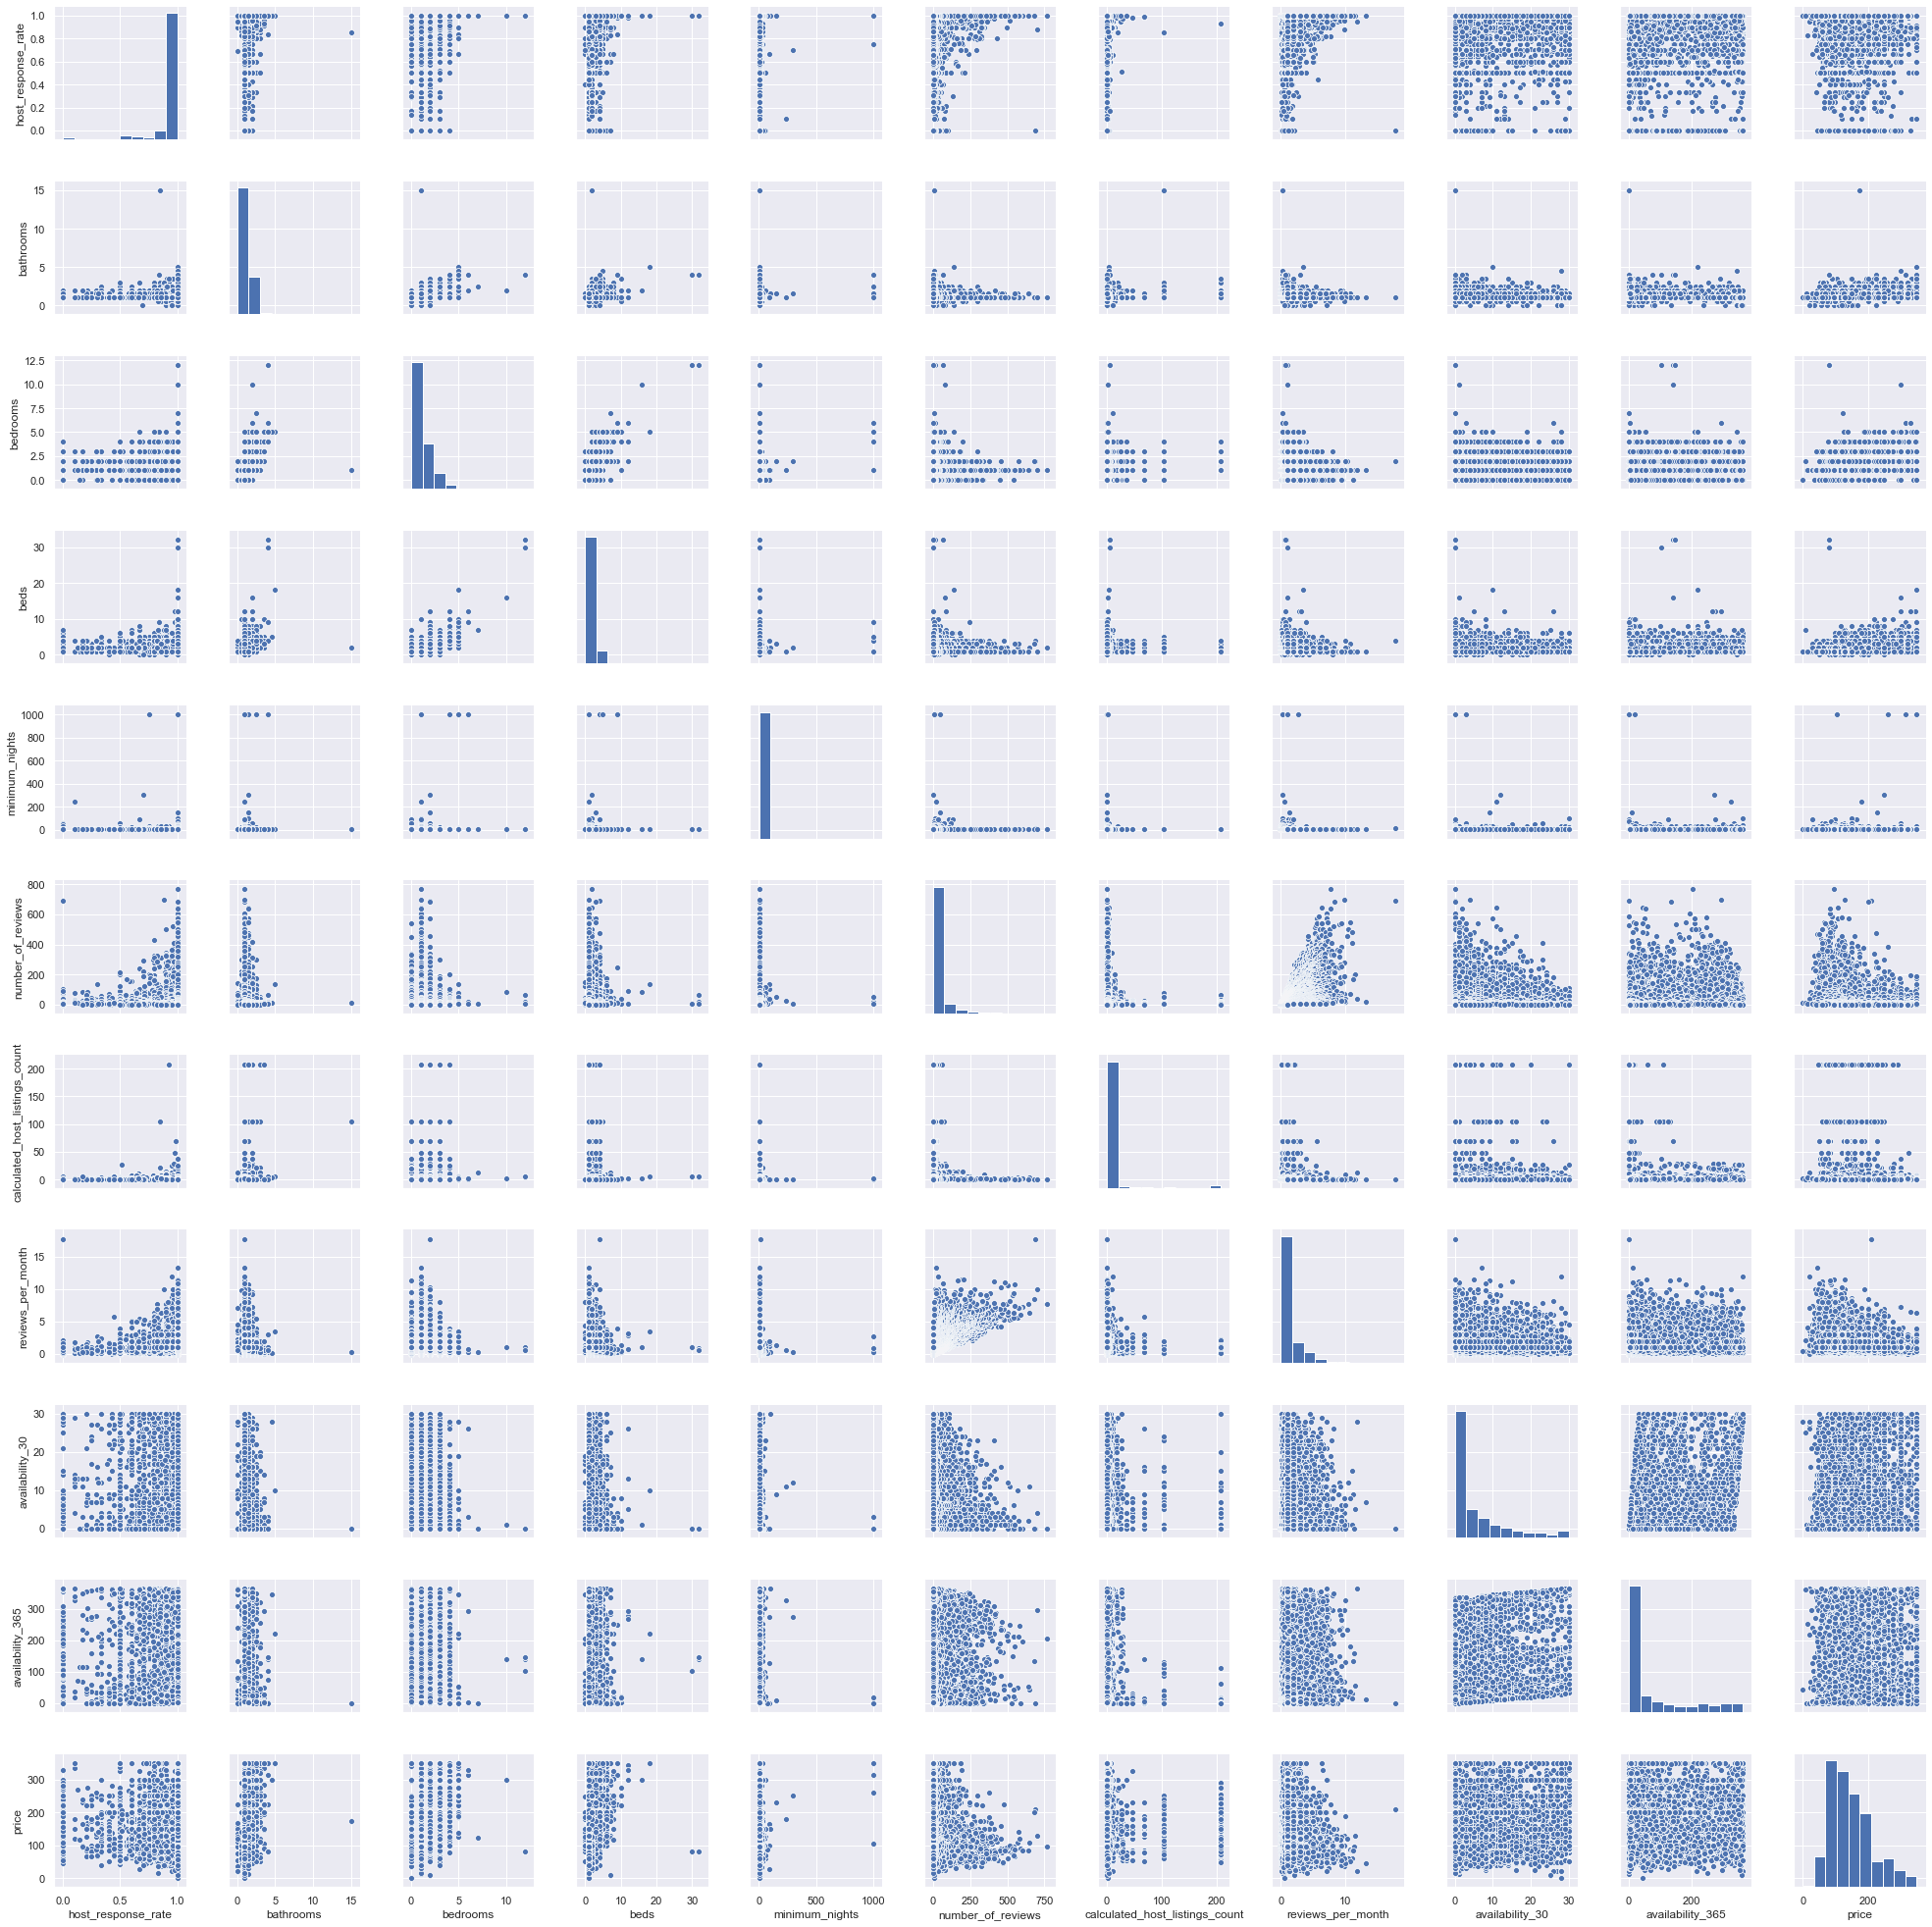

In [46]:
#Let`s pairplot all the numeric variables
for_the_plot=df.select_dtypes(exclude=['object']).columns
#df_num = df[for_the_plot]
ax = sns.pairplot(df[for_the_plot])

# Dummy variables creation for categorical variables

In [47]:
dummies = pd.get_dummies(df[cat_cols])
dummies.shape

(10350, 62)

In [48]:
dummies = pd.get_dummies(df[cat_cols], drop_first = True)
dummies.shape

(10350, 57)

In [49]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)

In [50]:
# Drop the original cat variables as dummies are already created

df.drop( cat_cols, axis = 1, inplace = True)
df.shape

(10350, 68)

# Splitting the Data into Training and Testing Sets

In [51]:
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [52]:
scaler = preprocessing.StandardScaler()

In [53]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

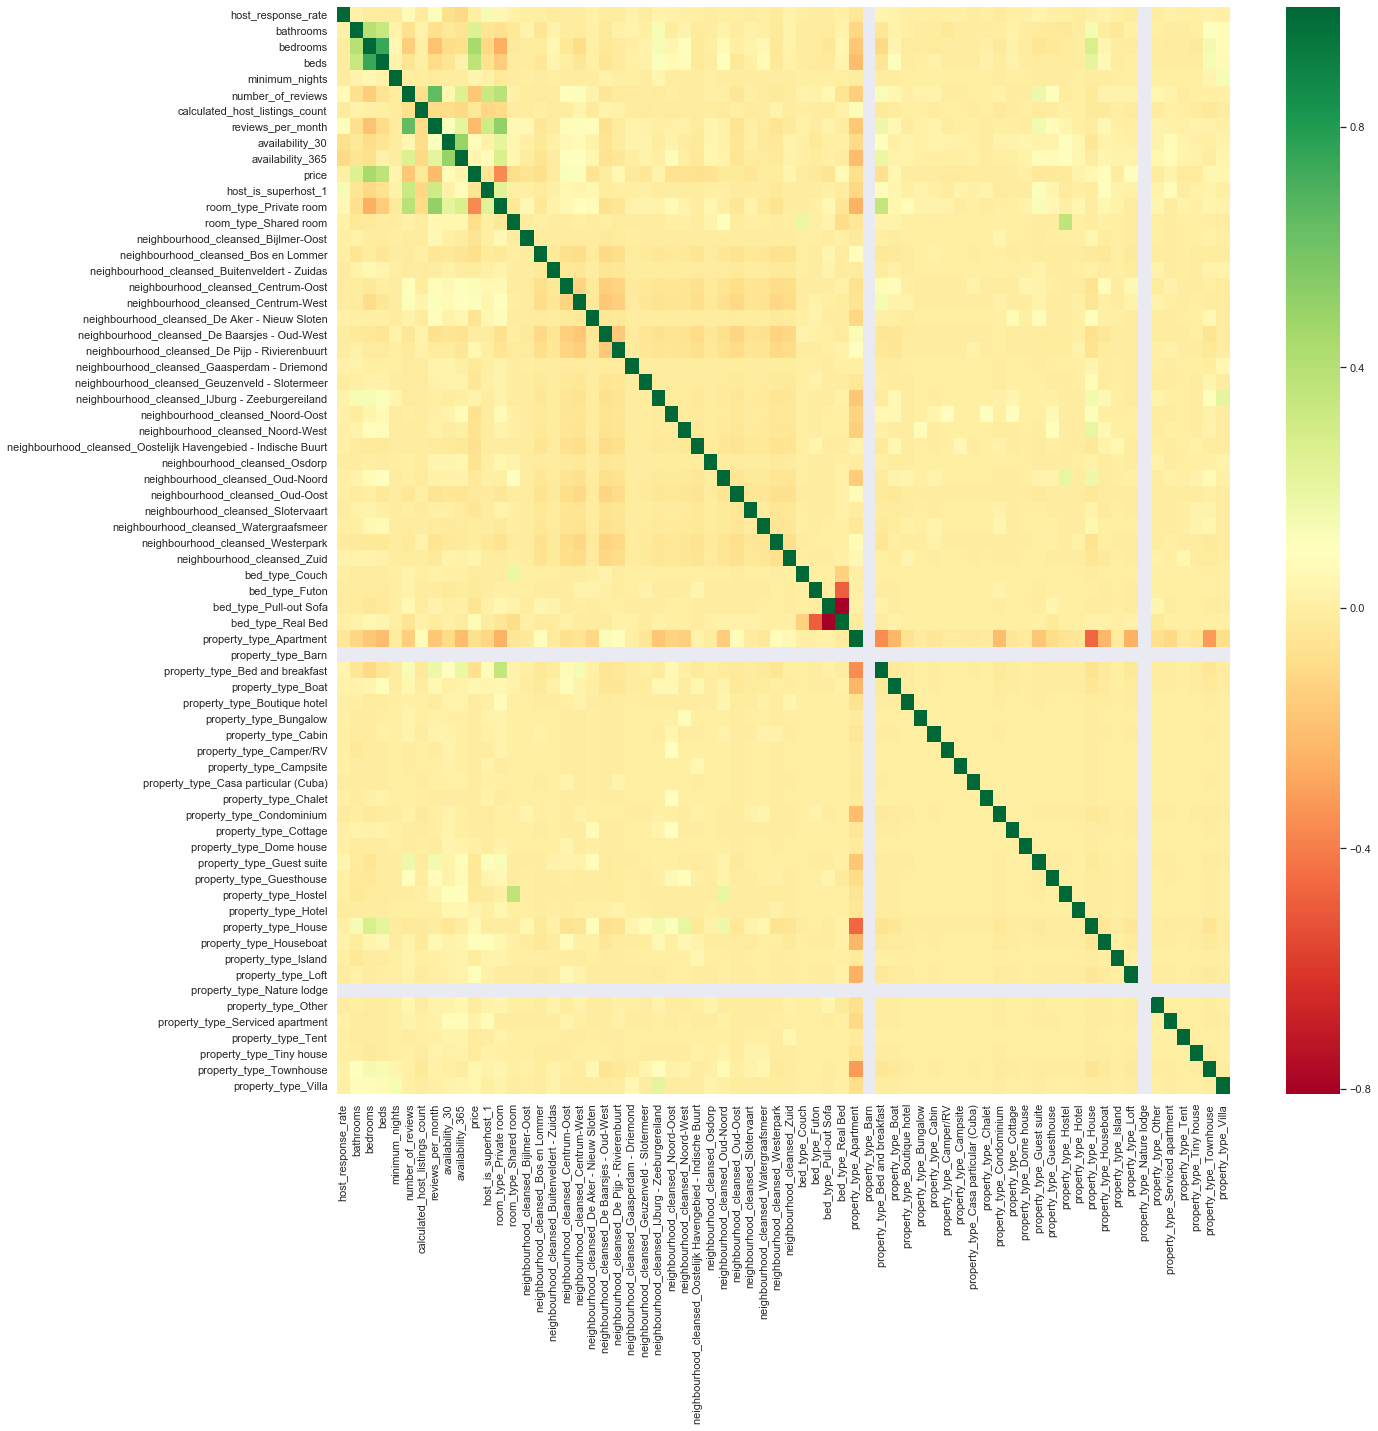

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

# Dividing into X and Y sets for the model building

In [55]:
y_train = df_train.pop('price')
X_train = df_train

In [56]:
df.shape

(10350, 68)

# Building MLR

In [57]:
# Running RFE with the output number of the variable equal to 24
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             
rfe = rfe.fit(X_train, y_train)

In [58]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['host_response_rate', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'reviews_per_month', 'availability_30', 'availability_365',
       'host_is_superhost_1', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_cleansed_Bijlmer-Oost',
       'neighbourhood_cleansed_Bos en Lommer',
       'neighbourhood_cleansed_Buitenveldert - Zuidas',
       'neighbourhood_cleansed_Centrum-Oost',
       'neighbourhood_cleansed_Centrum-West',
       'neighbourhood_cleansed_De Aker - Nieuw Sloten',
       'neighbourhood_cleansed_De Baarsjes - Oud-West',
       'neighbourhood_cleansed_De Pijp - Rivierenbuurt',
       'neighbourhood_cleansed_Gaasperdam - Driemond',
       'neighbourhood_cleansed_Geuzenveld - Slotermeer',
       'neighbourhood_cleansed_IJburg - Zeeburgereiland',
       'neighbourhood_cleansed_Noord-Oost',
       'neighbourhood_cleansed_Noord-West',
       'neighbourhood_cleansed_Oostelijk H

In [59]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

In [60]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     83.12
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:27:20   Log-Likelihood:                -38525.
No. Observations:                7244   AIC:                         7.718e+04
Df Residuals:                    7178   BIC:                         7.764e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# RFE and VIF (Variance Inflation Factor)
Let's use Recursive feature elimination since we have too many independent variables
Variables which have VIF higher than 5 is not desirable hence it means the variable is highly correlated with other variables or a variable. 

Conditions to follow:

High p-value High VIF : Drop the variable
High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
Low p-value Low VIF : accept the variable

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,bed_type_Real Bed,376.4200
38,property_type_Apartment,110.3600
19,neighbourhood_cleansed_De Baarsjes - Oud-West,48.1800
17,neighbourhood_cleansed_Centrum-West,37.9000
20,neighbourhood_cleansed_De Pijp - Rivierenbuurt,34.2400
16,neighbourhood_cleansed_Centrum-Oost,27.9100
32,neighbourhood_cleansed_Westerpark,23.1400
29,neighbourhood_cleansed_Oud-Oost,20.0400
33,neighbourhood_cleansed_Zuid,18.9500
14,neighbourhood_cleansed_Bos en Lommer,16.9400


In [62]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop(['bed_type_Real Bed', 'property_type_Apartment',
                                 'neighbourhood_cleansed_De Baarsjes - Oud-West',
                                 'neighbourhood_cleansed_De Pijp - Rivierenbuurt'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     87.41
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:27:24   Log-Likelihood:                -38547.
No. Observations:                7244   AIC:                         7.722e+04
Df Residuals:                    7182   BIC:                         7.764e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bedrooms,2.6900
3,beds,2.3800
11,room_type_Private room,2.1600
7,reviews_per_month,2.0500
5,number_of_reviews,1.9100
9,availability_365,1.5400
10,host_is_superhost_1,1.4700
52,property_type_House,1.4300
8,availability_30,1.4000
36,property_type_Bed and breakfast,1.2900


In [64]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe.drop(['bed_type_Real Bed', 'property_type_Apartment',
                                 'neighbourhood_cleansed_De Baarsjes - Oud-West',
                                 'neighbourhood_cleansed_De Pijp - Rivierenbuurt',
                                 'minimum_nights','reviews_per_month','neighbourhood_cleansed_Oud-Oost',
                                 'neighbourhood_cleansed_Westerpark','neighbourhood_cleansed_Zuid',
                                 'bed_type_Pull-out Sofa'], 1,)
    
# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe1 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     96.39
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:27:27   Log-Likelihood:                -38557.
No. Observations:                7244   AIC:                         7.723e+04
Df Residuals:                    7188   BIC:                         7.761e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bedrooms,2.6700
3,beds,2.3800
9,room_type_Private room,1.9300
7,availability_365,1.5300
46,property_type_House,1.4200
8,host_is_superhost_1,1.4200
6,availability_30,1.3900
4,number_of_reviews,1.3100
30,property_type_Bed and breakfast,1.2900
44,property_type_Hostel,1.2300


In [66]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe.drop(['bed_type_Real Bed', 'property_type_Apartment',
                                 'neighbourhood_cleansed_De Baarsjes - Oud-West',
                                 'neighbourhood_cleansed_De Pijp - Rivierenbuurt',
                                 'minimum_nights','reviews_per_month','neighbourhood_cleansed_Oud-Oost',
                                 'neighbourhood_cleansed_Westerpark','neighbourhood_cleansed_Zuid',
                                 'bed_type_Pull-out Sofa','property_type_Barn','property_type_Boat',
                                'property_type_Bungalow','property_type_Cabin','property_type_Camper/RV',
                                'property_type_Campsite','property_type_Chalet','property_type_Condominium',
                                'property_type_Cottage','property_type_Dome house','property_type_Island',
                                'property_type_Nature lodge','property_type_Other','property_type_Tent',
                                'property_type_Tiny house','property_type_Villa','bed_type_Couch',
                                'bed_type_Futon','property_type_Casa particular (Cuba)','property_type_House'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     96.39
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:27:29   Log-Likelihood:                -38557.
No. Observations:                7244   AIC:                         7.723e+04
Df Residuals:                    7188   BIC:                         7.761e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bedrooms,2.5700
3,beds,2.3500
9,room_type_Private room,1.9000
7,availability_365,1.5300
8,host_is_superhost_1,1.4200
6,availability_30,1.3800
4,number_of_reviews,1.3000
27,property_type_Bed and breakfast,1.2700
1,bathrooms,1.2200
31,property_type_Hostel,1.2200


After eliminating highly correlated  and insignificant variables, the models R2-coefficient od determination didnt change much. That`s why we will stick to the last model built.

In [68]:
# Predicting the price of training set.
y_train_price = lm_rfe3.predict(X_train_rfe3c)

Text(0.5, 0, 'Errors')

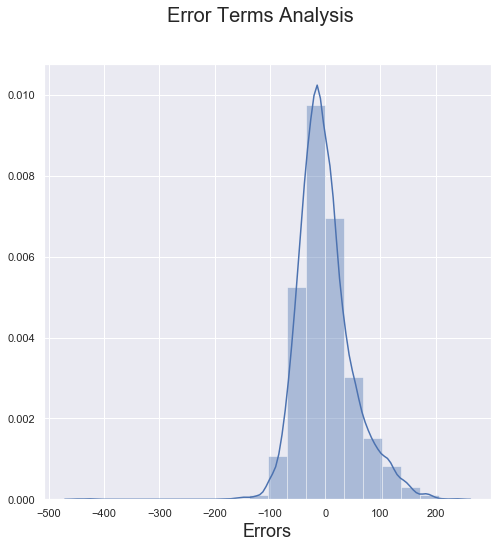

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [70]:
# Avtual vs predicted values

error = pd.DataFrame({'Actual Values': np.array(y_train), 'Predicted Values': y_train_price})
error.head(10)

,Actual Values,Predicted Values
19499,189.0000,228.0604
11241,80.0000,117.9549
13939,165.0000,180.3175
5284,250.0000,233.9852
4207,99.0000,121.6884
15091,158.0000,117.3681
12519,120.0000,165.5379
16729,175.0000,164.0809
10773,200.0000,171.5471
14344,150.0000,118.0717


In [71]:
import warnings
warnings.filterwarnings("ignore")

df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.shape

(3105, 68)

Text(0, 0.5, 'predicted')

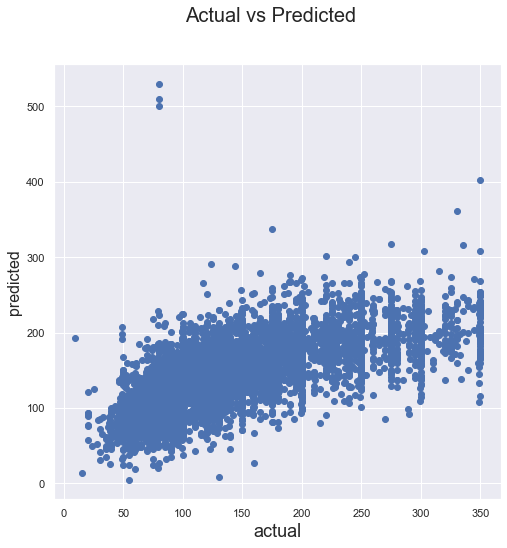

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_price)
fig.suptitle('Actual vs Predicted', fontsize=20)   
plt.xlabel('actual', fontsize=18)                       
plt.ylabel('predicted', fontsize=16) 

In [73]:
# Evaluated metrics

mae = mean_absolute_error(y_train,y_train_price)
mse = mean_squared_error(y_train,y_train_price)
rmse = np.sqrt(mean_squared_error(y_train,y_train_price))
r2 = r2_score(y_train,y_train_price)

def mean_absolute_percentage_error(y_train, y_train_price): 
    y_train, y_train_price = np.array(y_train), np.array(y_train_price)
    return np.mean(np.abs((y_train - y_train_price) / y_train)) * 100

mape=mean_absolute_percentage_error(y_train, y_train_price)

print('MAE (Mean Absolute Error): %s' %mae)
print('MAPE (Mean Absolute Percentage Error): %s' %mape)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 37.250013862554866
MAPE (Mean Absolute Percentage Error): 28.809268165810405
MSE (Mean Squared Error): 2472.1742562152876
RMSE (Root mean squared error): 49.72096395098639
R2 score: 0.421256614029757


# Conclusion
The model's R2 and adjusted R2 are not that high, 0.42. It means 42% of variance in target variable is explained by the independent variables of the model. This implies that overall model fit is not good.
In terms of accuracy, a model doesn`t fit the data well, the differences between the observed values and the model's predicted values are not small. Error rate is high as well. 
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that  all the predictors are statistically significant.

For further steps it might be helpful to use neural network regression analysis instead of MLR. I believe it wil give higher R2, somewhere 0.52. 
However, I also believe the prices given are somehow biased and assuming that rooms/apartments that are being rented might have other factors such as how old is the building, the condition of the room. Adding utilies column to the analysis might become significant factor and increase R2 of the model. 
It is a subjective analysis. Hence, this is my work and my conclusion.